In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pickle


%matplotlib inline

In [16]:
fs_dropouts = pd.read_csv('data/9th_grade_dropouts.csv', index_col='sid')

In [17]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52932 entries, 2 to 111990
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dropout           52932 non-null  int64  
 1   male              52932 non-null  float64
 2   math_ss           52932 non-null  float64
 3   read_ss           52932 non-null  float64
 4   gifted            52932 non-null  int64  
 5   ever_alternative  52932 non-null  int64  
 6   iep               52932 non-null  int64  
 7   pct_days_absent   52932 non-null  float64
 8   gpa               52932 non-null  float64
 9   frpl              52932 non-null  float64
 10  ell               52932 non-null  int64  
 11  race_num          52932 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 5.2 MB


OK, let's train/test/split our data

In [18]:
X = fs_dropouts.copy()

In [19]:
y = X.pop('dropout')
y

sid
2         0
5         0
12        1
13        0
14        0
         ..
111984    0
111985    0
111986    0
111988    1
111990    0
Name: dropout, Length: 52932, dtype: int64

In [20]:
X

,male,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell,race_num
sid,,,,,,,,,,,
2,0.0,-1.0,-1.0,0,1,0,10.664031,1.230000,1.0,0,0
5,0.0,18.0,46.0,0,0,0,0.969005,2.822795,1.0,0,0
12,0.0,18.0,35.0,0,1,0,4.746706,0.330000,0.0,0,0
13,0.0,48.0,80.0,0,0,1,6.850071,2.985000,1.0,0,0
14,1.0,18.0,30.0,0,0,0,5.802631,2.118500,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
111984,1.0,34.0,44.0,0,1,1,9.833898,2.079800,1.0,0,1
111985,0.0,23.0,51.0,1,1,0,2.291429,3.443500,0.0,0,0
111986,1.0,4.0,18.0,0,0,1,7.766962,1.695142,1.0,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
rf = RandomForestClassifier(n_estimators = 5000)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5000)

In [24]:
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.8564231738035264

In [25]:
cm_rf = confusion_matrix(y_test,y_pred)
cm_rf

array([[12240,   613],
       [ 1667,  1360]])

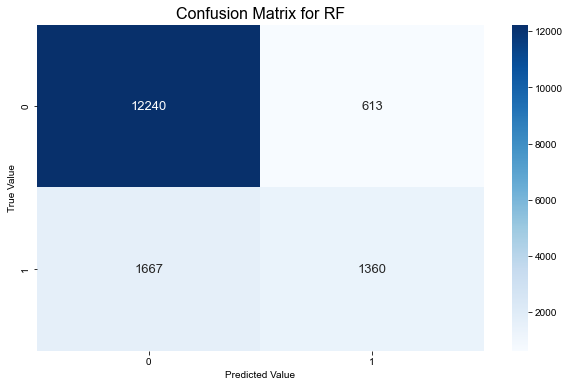

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt = "g",cmap = "Blues",annot_kws={"size": 13})
sns.set(font_scale=1.2) # for label size
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for RF', fontsize = 16)
plt.savefig('confusion-matrix-random-forest.png')

In [27]:
score = classification_report(y_test,y_pred, target_names = ['Not Dropout', 'Dropout'])
print(score)

              precision    recall  f1-score   support

 Not Dropout       0.88      0.95      0.91     12853
     Dropout       0.69      0.45      0.54      3027

    accuracy                           0.86     15880
   macro avg       0.78      0.70      0.73     15880
weighted avg       0.84      0.86      0.84     15880



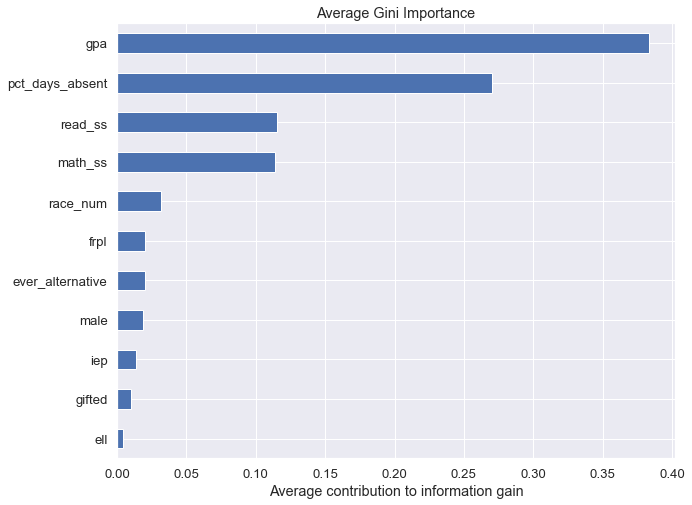

In [28]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=X.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

This is not the best...Let's see if we can improve it. I want my dropout precision to be better! 

In [30]:
#Because class is imbalanced, let's try doing some minority class oversampling
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
X_os, y_os = os.fit_sample(X_train, y_train)
print("length of oversampled data is ",len(X_os))
print("number of negative case in oversampled data",len(y_os == 0))
print("Proportion of no subscription data in oversampled data is ",len(y_os==0)/len(X_os))

length of oversampled data is  60388
number of negative case in oversampled data 60388
Proportion of no subscription data in oversampled data is  1.0


In [31]:
X_os.shape

(60388, 11)

In [32]:
X_train.shape

(37052, 11)

In [ ]:
rf.fit(X_os,y_os)
y_pred_os = rf.predict(X_test)
rf.score(X_test,y_test)



In [ ]:
y_pred = rf.predict(X_test)


Let's do some more feature engineering. Let's get rid first of gpa...